# Project: No Show Appointment Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>I have selected noshowappointments-kagglev2-may-2016.csv for this project. In this report, I will be analysing the factors responsible for No Shows on scheduled appointments</p>
<p>From this dataset, I will attempt to answer the following question</p>
<ol type="1">
  <li><a href="#q1">To what extent does age contribute to people missing their appointments</a></li>
  <li><a href="#q2">To what extent does Gender influence showing up or missing appointments</a></li>
  <li><a href="#q3">Is there any correlation between SMS notification and the likelyhood not to show up</a></li>
</ol>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

<b>Import required python packages for the analysis</b>

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [3]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df.head(100)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


<b>I loaded the dataset using pandas read_csv function and printed the first 100 rows using the head function. With this output, I was able visually inspect the dataset, see the available columns and column values.</b>

In [4]:
df.shape

(110527, 14)

With the shape property, I can see the dataset had a size of 110527 rows and 14 columns

In [5]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

df.describe()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



With the isna() function, I found no missing values in the dataset




In [7]:
df.info

<bound method DataFrame.info of            PatientId  AppointmentID Gender          ScheduledDay  \
0       2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1       5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2       4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3       8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4       8.841186e+12        5642494      F  2016-04-29T16:07:23Z   
5       9.598513e+13        5626772      F  2016-04-27T08:36:51Z   
6       7.336882e+14        5630279      F  2016-04-27T15:05:12Z   
7       3.449833e+12        5630575      F  2016-04-27T15:39:58Z   
8       5.639473e+13        5638447      F  2016-04-29T08:02:16Z   
9       7.812456e+13        5629123      F  2016-04-27T12:48:25Z   
10      7.345362e+14        5630213      F  2016-04-27T14:58:11Z   
11      7.542951e+12        5620163      M  2016-04-26T08:44:12Z   
12      5.666548e+14        5634718      F  2016-04-28T11:33:51Z   
13      9.113946

To get more information about the dataset loaded in my dataframe, I used the .info method

In [8]:
df.duplicated().sum()

 

0


I found no duplicate entries



### Data Cleaning (Replace this with more specific notes!)

In [9]:

df.drop(['PatientId','AppointmentID'],axis =1, inplace =True) 
df.head() #Print the columns left




,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I dropped columns PatientId, AppointmentID as I will not be requiring these in my analysis

In [10]:
#Convert No-show column into integer field
df['NoShow']=[1 if x=='Yes' else 0 for x in df['No-show']]
df['NoShow']

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         1
8         0
9         0
10        0
11        1
12        0
13        0
14        0
15        0
16        0
17        1
18        0
19        0
20        1
21        1
22        1
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
110497    0
110498    0
110499    0
110500    0
110501    0
110502    0
110503    0
110504    0
110505    0
110506    0
110507    0
110508    0
110509    0
110510    0
110511    0
110512    0
110513    0
110514    0
110515    1
110516    1
110517    0
110518    0
110519    0
110520    0
110521    0
110522    0
110523    0
110524    0
110525    0
110526    0
Name: NoShow, Length: 110527, dtype: int64

<b>
I converted the No Show column to integer values so I can plot the fields on a graph
<ul>
  <li>1 : Yes</li>
  <li>0 : No</li>
</ul>
</b>

In [11]:
#Convert Gender column into integer field 1: Male 2: Female
df['Gender_Numeric']=[1 if x=='M' else 2 for x in df['Gender']]
df['Gender_Numeric']

0         2
1         1
2         2
3         2
4         2
5         2
6         2
7         2
8         2
9         2
10        2
11        1
12        2
13        1
14        2
15        2
16        1
17        2
18        2
19        2
20        2
21        2
22        1
23        2
24        2
25        1
26        2
27        2
28        1
29        2
         ..
110497    1
110498    2
110499    2
110500    2
110501    1
110502    2
110503    2
110504    2
110505    2
110506    1
110507    2
110508    2
110509    1
110510    2
110511    2
110512    2
110513    1
110514    2
110515    1
110516    2
110517    2
110518    2
110519    2
110520    2
110521    2
110522    2
110523    2
110524    2
110525    2
110526    2
Name: Gender_Numeric, Length: 110527, dtype: int64

In [12]:

     
df.info()
        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
NoShow            110527 non-null int64
Gender_Numeric    110527 non-null int64
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


b>Did same for the Gender column
<ul>
  <li>1 : M</li>
  <li>2 : F</li>
</ul>
    </b>



<b>We can see here that the Dtype for Gender and No-show are not integer fields</b>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1c0a9c940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc1c087f470>]], dtype=object)

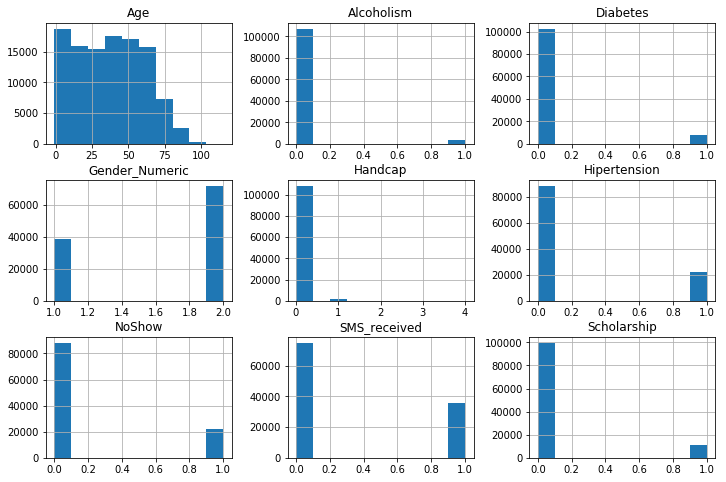

In [13]:
df.hist(figsize=(12,8))

<b>I plotted a histogram of the dataframe and observed the following.</b>
<ul>
  <li>Most people did not receive SMS</li>
  <li>Fewer people have diabeties</li>
  <li>We have fewer alcoholics than non alcoholics</li>
  <li>Age distribution is skewed towards younger population</li>
</ul>

# Exploratory Data Analysis

<a id='q1'></a>
### Research Question 1 Exploring the Age Column- To what extent does age contribute to people missing their appointments

In [14]:

df.dropna(inplace=True)

df['Age'] = pd.to_numeric(df['Age'])
df['NoShow'] = pd.to_numeric(df['NoShow'])
did_not_showup = df['NoShow'] == 1
did_showup = df['NoShow'] == 0

<b>
<ul>
  <li>To further clean up this data, I dropped NA fields</li>
  <li>I renamed No-show to NoShow</li>
  <li>I made sure all fields in Age and No-show columns are numeric</li>
  <li>Filtered NoShow into 2 Series - Those that showed up and those who did not</li>
</ul>    
</b>

In [15]:

df.Age[did_not_showup].mean()

34.317666562121957

<b>Computed mean age of those who did not show up</b>

In [16]:
df.Age[did_showup].mean()


37.790064393252315

<b>Computed mean age of those who showed up</b>

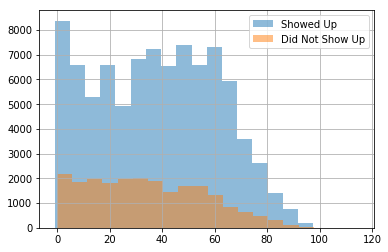

In [17]:
df.Age[did_showup].hist(alpha=0.5, bins=20, label='Showed Up')
df.Age[did_not_showup].hist(alpha=0.5, bins=20, label='Did Not Show Up')
plt.legend();

<b>Plotted the age distribution of showed up and Did not show on histogram</b>

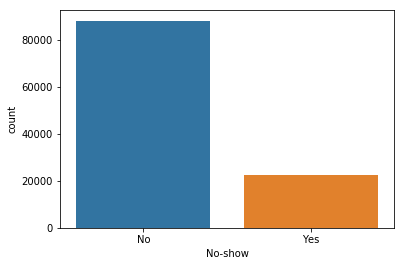

In [18]:
sb.countplot(data=df, x='No-show');

<b>Histogram of the count of those who showed up versus those who did not</b>
<li>From the plot above, 88208 patients showed up while 22319 did not</li>

In [19]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

<b>Count of those who showed up and those who did not</b>

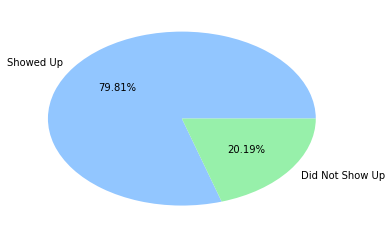

In [20]:
colors = sb.color_palette('pastel')[0:5]
labels = ['Showed Up', 'Did Not Show Up']
plt.pie(df['NoShow'].value_counts(),labels=labels, colors = colors, autopct='%.002f%%')
plt.show()

<b>Percentage of Show up Versus Did not Show up</b>
<li>About 80% showed up while 20% did not</li>

In [21]:
def box_plot(column,title):
    ax=sb.boxplot(x=target_column,y=column, palette=["r","c"],
                 hue=target_column, data=df).set_title(title, fontsize=15)
plt.show()

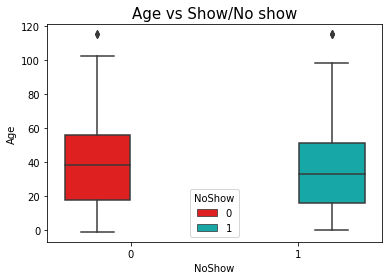

In [22]:
#Show or No show  with age
target_column ='NoShow'
column='Age'
title= 'Age vs Show/No show'
box_plot(column,title)

<b>Box Plot of Age with Show up data</b>
<li>Older patients tend to have a marginally higher show up rates than younger ones</li>

<a id='q2'></a>
### Research Question 2  Exploring the Gender Column- To what extent does Gender influence showing up or missing appointments

In [23]:
column_to_explore='Gender'
df[column_to_explore].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

<b>A count of the Male and Female gender in the dataset</b>

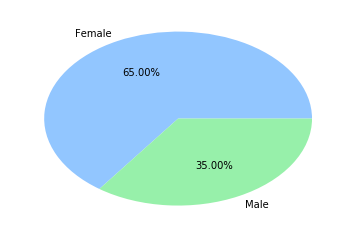

In [24]:
colors = sb.color_palette('pastel')[0:5]
labels = ['Female', 'Male']
plt.pie(df[column_to_explore].value_counts(),labels=labels, colors = colors, autopct='%.002f%%')
plt.show()

<b>A pie chart of the percentage of Male to Female gender in the dataset</b>
<li>The dataset contains has more Female patients than Male</li> 

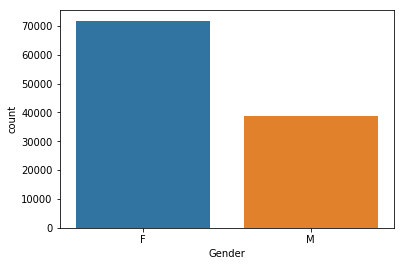

In [25]:
sb.countplot(data=df, x=column_to_explore);

<b>A histogram of the same</b>
<li>71840 Female Patients and 38687 Male</li>

In [26]:
df.groupby('No-show')['Gender'].value_counts()

No-show  Gender
No       F         57246
         M         30962
Yes      F         14594
         M          7725
Name: Gender, dtype: int64




<b>A count distribution of NoShow with respect to gender</b>


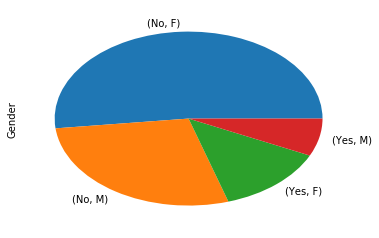

In [27]:
df.groupby('No-show')['Gender'].value_counts().plot(kind='pie',x = 'Gender', y = 'count')

<li>There is a larger count of No Show from Females than in Male as well a larger Show Up count from Females compared to Males. This may be because the dataset set contains more Female rows than Male</li>

In [28]:
df.Gender_Numeric[did_showup].mean()

1.6489887538545256

In [29]:
df.Gender_Numeric[did_not_showup].mean()

1.6538823423988529

<a id='q3'></a>
### Research Question 3  Exploring the correlation between SMS notification and the likelyhood not to show up

In [30]:
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [31]:
df.groupby('SMS_received')['No-show'].value_counts()

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64




<b>A count of those who did or did not receive sms and No show data<b>
    in this count a large number of patients happen not to reached via SMS.
    
    

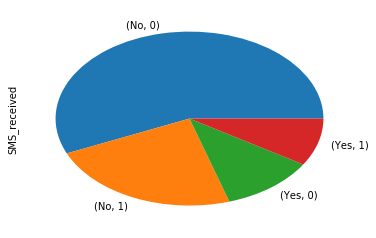

In [32]:
df.groupby('No-show')['SMS_received'].value_counts().plot(kind='pie',x = 'SMS_received', y = 'count')

# <a id='conclusions'></a>
## Conclusions

<ul>
  <li>With a mean No show age of 34.32 compared to 37.79 for show up, younger people are marginally likely to not show up for appointments</li>
  <li>Females are more likely than Males to show up </li>
  <li>Majority did not recieve SMS notifications</li>
</ul>



# Limitations

<ol type="1">
    <li>This analysis did not investigate the correlation between the following fields and the number of no-show
        <ul>
          <li>Hypertension</li>
          <li>Diabetes</li>
          <li>Alcoholism</li>
          <li>Neighbourhood</li>
          <li>Scholarship</li>
          <li>Handcap</li>
        </ul>
    </li>
     <li>The dataset set contains more Female rows than Male</li>


In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0